## Assignment 2 -- Salvador GARCIA -- s1655274

## Problem 1

The original problem:
$$f(x) = \left[\; \sum_{i = 1}^{d} \phi_j^*(b_j^T x) \;\right] + \gamma x^T x$$

f(x) can be rewritten in a easier way, but some consideration about the function $\phi_j^*(s)$ should be done. This is a piecewise function, now we will consider the case when s<-1: 

$$f(x) = \left[\; \sum_{i = 1}^{d} \frac{(b_j^T x + 1)^2}{2\alpha_j} \;\right] + \gamma x^T x$$
$$f(x) = \left[\; \frac{1}{2}\sum_{i = 1}^{d} \left(\;\frac{b_j^T}{\sqrt{\alpha_j}} x + \frac{1}{\sqrt{\alpha_j}}\;\right)^2 \;\right] + \gamma x^t x$$

Now, let's call $A_j = \frac{b_j^T}{\sqrt{\alpha_j}}$ and $c_j = \frac{1}{\sqrt{\alpha_j}}$. (for the other cases, c will be defined different. For $s>1$, $c_j = -\frac{1}{\sqrt{\alpha_j}}$ and for $s \in (-1,1)$, $c_j = -A_j^Tx$)
$$f(x) = \left[\; \frac{1}{2}\sum_{i = 1}^{d} \left(\;A_j x + c_j\;\right)^2 \;\right] + \gamma x^T x$$

This last expression is equivalent to the norm $||Ax||^2_2 = \sum_j(A_jx)^2$ with $A_j$ the rows of A:

$$f(x) = \frac{1}{2}||Ax + c||^2_2  + \gamma ||x^Tx||$$

$$f(x) = \frac{1}{2}(Ax + c)^T (Ax + c)  + \gamma x^T x $$
$$f(x) = \frac{1}{2}\left(\;\ x^TA^TAx +  2 x^TA^Tc + c^Tc\;\right) + \gamma x^T x $$

Taking the derivative of the last expression:
$$\nabla f(x) = x^TA^TA + c^TA + 2\gamma x^T$$

Now, using the Definition 8 from the lecture, we have that $f(x+h) \leq f(x) + \nabla f(x)^T h + h^T M h$. Lets divide this expression in LHS and RHS. The LHS is equivalent to:

$$f(x+h) = \frac{1}{2} (x+h)^TA^TA(x+h) +  (x+h)^TA^Tc + \frac{1}{2}  c^Tc + \gamma (x+h)^T(x+h) $$
$$f(x+h) = \left(\;\ \frac{1}{2} x^TA^TAx +  x^TA^Tc + \frac{1}{2}  c^Tc + \gamma x^Tx \;\right) + \left(\;\ x^TA^TAh + c^TAh + 2\gamma x^Th \;\right)+ h^T (A^TA + \gamma I)h$$ 

And the RHS:
$$f(x) + \nabla f(x)^T h + h^T M h =\left(\;\ \frac{1}{2} x^TA^TAx +  x^TA^Tc + \frac{1}{2}  c^Tc + \gamma x^Tx \;\right) + \left(\;\ x^TA^TAh + c^TAh + 2\gamma x^Th \;\right)+ h^T M h$$

This inequality is an equality when $M = A^T A + \gamma I $. This result makes sense with the theorem 9 from the lecture 7. The dimmensionalities of the matrices and vectors for this assignment are the following:

$A \in ℝ^{d\times n} \qquad M \in ℝ^{n\times n} \qquad x \in ℝ^{n\times 1} \qquad c \in ℝ^{d\times 1} \qquad h \in ℝ^{n\times 1} \qquad v \in ℝ^{n\times 1}$

In [5]:
using Distributions
srand(123456)

# Define parameters for the function ComputeESO ----------------------
global n = 5               # number of columns of A
global d = 4               # number of rows of A
global B = randn(d, n)     # M = A^T A
global alpha = zeros(d,1)  # useful to calculate A, c_1 and c_3
global gamma = 1/d         # penalization term
global tau = 2

# global A, c_1 and c_3 according to the above definitions------------
global c_1 = zeros(d,1)    # for new_nomenclature (for the case s <-1)
global c_3 = zeros(d,1)    # for new_nomenclature (for the case s > 1)
                           # for new_nomenclature (the case s \in (-1,1) just put 0)
global A = zeros(d,n)      # for new_nomenclature
global M_factor = zeros(d,n);

In [2]:
function samplingK(k, n) 
    reservoir = collect(1:k)
    for i=(k+1):n
        pos = rand(1:i)
        if pos <= k
            reservoir[pos] = i
        end
    end
    return reservoir
end

function ComputeESO(B, alpha, gamma, tau)
    
    # First of all, compute A, c_1, c_3 for the new nomenclature------
    for i = 1:d
        alpha[i] = n/i                   
        c_1[i] = 1/(sqrt(alpha[i]))      
        c_3[i] = -1/(sqrt(alpha[i]))
        A[i,:] = copy(B[i,:])            # careful when assigning a vector to another vector!
        A[i,:] = A[i,:]/sqrt(alpha[i])
    end
    M = A'* A + 2 *gamma* eye(n)         # A'A and gamma*eye are pos-semidef so A'A + 2 gamma*eye is pos-semidef.
    M_factor = chol(M)                   # so, apply Cholesky! Now M = M_factor' * M_factor  
    
    # Now, let's create the omegas and v ------------------------------
    omega = zeros(n,1)
    v = zeros(n,1)
    
    # Omega computation -----------------------------------------------
    for j = 1:n                          # The matrix M_factor is n \times n
        for i = 1:n
            if M_factor[j,i]!=0
                omega[j] += 1            # per row, count number of columns!=0
            end
        end
    end
    # v computation ---------------------------------------------------
    for i = 1:n                          # The matrix M_factor is n \times n
        for j = 1:n
            # According to the formula of lecture 7
            v[i] = v[i]+(1+(tau-1)*(omega[j]-1)/(n-1))*M_factor[j,i]*M_factor[j,i]
        end
    end
    return v
end

ComputeESO (generic function with 1 method)

In [4]:
# Compute v parameters ----------------------------------
v = ComputeESO(B, alpha, gamma, tau)

5×1 Array{Float64,2}:
 3.42953 
 1.37536 
 2.69978 
 0.965992
 1.56299 

In [166]:
function f_calc(x, A, c_1, c_3, gamma, alpha)
    # function to compute the value of f(x)
    fx = 0
    for i = 1:d
        s = A[i,:]'*x
        if s[1]<(-1/alpha[i])  # when s < -1
            fx = fx + 1/2*(s + c_1[i])^2 
        elseif s[1]>(1/alpha[i])                  # when s > 1
            fx = fx + 1/2*(s + c_3[i])^2
        else                             # when s \in (-1,1)
            fx = fx 
        end
    end
    return fx + gamma*x'*x               # add the regularization factor 
end

function df_calc(x, A, c_1, c_3, gamma, alpha, j)
    # function to compute the value of \nabda f(x)
    dfx = zeros(1,n)
    for i = 1:d
        s = A[i,:]'*x
        if s[1]<(-1/alpha[i])                    # when s < -1
            dfx[j] = (dfx[j] + (s + c_1[i])*A[i,j])[1]
        elseif s[1]>(1/alpha[i])                  # when s > 1
            dfx[j] = (dfx[j] + (s + c_3[i])*A[i,j])[1]
        else                             # when s \in (-1,1)
            dfx[j] = dfx[j]
        end
    end
    return dfx[j] + 2*gamma*x'[j]              # add the regularization factor 
end

function ESO_Test(A,alpha,gamma,tau)
    # Random x -----------------------------------------
    x = randn(n,1)*10                    # For this test, random entries for x will be taken
                                         # I used normally distributed random x because the 
                                         # domain is (-inf, inf) and, when multiplied by 100, 
                                         # with 95% of prob the initial values in each entry
                                         # will be between (-19.6, 19.6)
    p = zeros(n,1).+tau/n                # Probability is tau/n for each entry
    fx = f_calc(x, A, c_1, c_3, gamma, alpha)   
    dfx = zeros(n,1)
    h = zeros(n,1)
    for i = 1:n
        dfx[i] = df_calc(x, A, c_1, c_3, gamma, alpha, i)
    end
    
    # Calculate h --------------------------------------
    
    for i = 1:n
        h[i] = -dfx[i]/v[i]
    end
#    h = -diagm(1./v[1:n])*dfx'           # Using the formula in lecture 6 for h

    # Calculate RHS ------------------------------------
    f1 = zeros(n, 1)                    
    f2 = zeros(n, 1)
    
    for i = 1:n
        f1[i] = p[i]*dfx[i]*h[i]
        f2[i] = p[i]*v[i]*h[i]*h[i]
    end

    RHS = (fx +sum(f1)+.5*sum(f2))[1]
    # Calculate LHS ------------------------------------
    x_samples_vec = zeros(50000,1)
    for i = 1:50000
        x_samples = copy(x)
        selected = samplingK(tau, n)
        for j = 1:tau
            x_samples[selected[j]] = x_samples[selected[j]] + h[selected[j]]
        end
        x_samples_vec[i] = f_calc(x_samples, A, c_1, c_3, gamma, alpha)[1]
    end
    LHS = mean(x_samples_vec[1:50000])
    println("The LHS is: $LHS and the is RHS: $RHS")
    return RHS-LHS
end



ESO_Test (generic function with 1 method)

In [167]:
ESO_Test_vec = ESO_Test(A,alpha,gamma,1)

The LHS is: 10262.463316858948 and the is RHS: 10269.728416528715


7.2650996697666415

In [168]:
n_tries = 20
ESO_Test_vec = zeros(n_tries,1)
sum_correct = 0
for j = 1:n_tries
    ESO_Test_vec[j] = ESO_Test(A,alpha,gamma,2)
    if ESO_Test_vec[j]>0
        sum_correct+=1
    end
end
perc_correct = sum_correct/n_tries*100
print("The percentage of random x where the ESO inequality holds is: $perc_correct")

The LHS is: 11475.515624745742 and the is RHS: 11490.55895521529
The LHS is: 13358.65719087749 and the is RHS: 13398.477378543512
The LHS is: 10516.91261700203 and the is RHS: 10531.798959012092
The LHS is: 11450.29931938492 and the is RHS: 11470.549308391546
The LHS is: 11020.287603832043 and the is RHS: 11039.634195397339
The LHS is: 16953.789841647846 and the is RHS: 17038.675134443336
The LHS is: 14387.618169526724 and the is RHS: 14433.338266130379
The LHS is: 14427.913476113763 and the is RHS: 14484.700960000193
The LHS is: 12196.817737479296 and the is RHS: 12228.808517351705
The LHS is: 12760.354486946659 and the is RHS: 12804.770364970942
The LHS is: 10838.516090992189 and the is RHS: 10857.457494369402
The LHS is: 11882.824201697009 and the is RHS: 11898.943184285536
The LHS is: 13837.765471976241 and the is RHS: 13889.819345322652
The LHS is: 11060.09114449358 and the is RHS: 11076.889329245587
The LHS is: 14515.984723053989 and the is RHS: 14562.386730915623
The LHS is: 155

In [169]:
function PlotSpeedup(B, alpha, gamma, tau)
    
    v_1 = ComputeESO(B,alpha,gamma,1)
    p_1 = zeros(n,1).+1/n    
    
    v_tau = ComputeESO(B,alpha,gamma,tau)
    p_tau = zeros(n,1).+tau/n
    max_num = 0
    max_denum = 0
    
    for i = 1:n
        if (v_tau[i]/p_tau[i])>max_num
            max_num = v_tau[i]/p_tau[i]
        end
        
        if (v_1[i]/p_1[i])>max_denum
            max_denum = v_1[i]/p_1[i]
        end
    end
    
    speedup = max_num/max_denum
    return speedup
end
        

PlotSpeedup (generic function with 1 method)

In [170]:
tau_speedup = zeros(30,1)
for i = 1:30
    tau_speedup[i] = PlotSpeedup(B, alpha, gamma, i)
end

print(tau_speedup)

[1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0][1000.0,

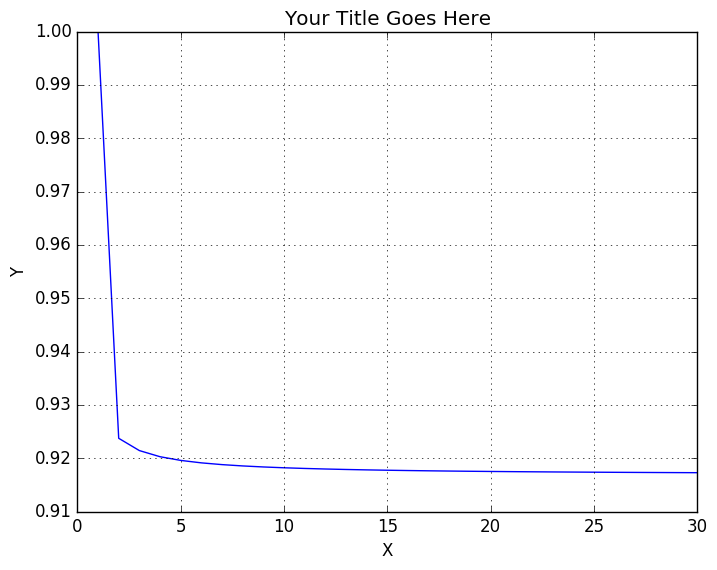

In [174]:
# Plot
using PyPlot

p = plot(1:30,tau_speedup)
xlabel("X")
ylabel("Y")
title("Your Title Goes Here")
grid("on")

In [175]:
srand(12345)
x0 = randn(n,1)*100
global c_1 = zeros(d,1)    # for new_nomenclature (for the case s <-1)
global c_3 = zeros(d,1)    # for new_nomenclature (for the case s > 1)
                           # for new_nomenclature (the case s \in (-1,1) just put 0)
global A = zeros(d,n)      # for new_nomenclature
global M_factor = zeros(d,n);

function NSyncMinibatch(B, alpha, gamma, tau, x0, k)
    v = ComputeESO(B, alpha, gamma, tau);
    dfx = zeros(n,1)
    h = zeros(n,1)
    for i = 1:k
        selected = samplingK(tau, n)
        for j = 1:tau
            dfx[selected[j]] = df_calc(x0, A, c_1, c_3, gamma, alpha, selected[j])
            h[selected[j]] = -dfx[selected[j]]/v[selected[j]] # Using the formula in lecture 6 for h
            x0[selected[j]] = x0[selected[j]] + h[selected[j]]
        end
        fx = f_calc(x0, A, c_1, c_3, gamma, alpha)[1]
        if i % 1000 == 0
            println("iter = $i ;;; fx = $fx")
        end
    end
    return 
end


NSyncMinibatch (generic function with 1 method)

In [176]:
NSyncMinibatch(B, alpha, gamma, 10, x0, 15000)

[1000.0,999.0,998.0,997.0,996.0,995.0,994.0,993.0,992.0,991.0]iter = 1000 ;;; fx = 98356.18128525009
iter = 2000 ;;; fx = 15960.437429953196
iter = 3000 ;;; fx = 2835.8247345820123
iter = 4000 ;;; fx = 546.406319394214
iter = 5000 ;;; fx = 111.82222440853035
iter = 6000 ;;; fx = 23.108777556154116
iter = 7000 ;;; fx = 5.419489114883662
iter = 8000 ;;; fx = 1.3152870060759996
iter = 9000 ;;; fx = 0.2816454740272872
iter = 10000 ;;; fx = 0.0749922502973561
iter = 11000 ;;; fx = 0.01801484243992625
iter = 12000 ;;; fx = 0.005350259051457395
iter = 13000 ;;; fx = 0.0018425221913762903
iter = 14000 ;;; fx = 0.001208572216871511
iter = 15000 ;;; fx = 0.0009822137123385057


In the first section the problem was defined as:

$$f(x) = \frac{1}{2}||Ax + c||^2_2  + \gamma ||x^Tx||$$

With each row of A equal to $A_j = \frac{b_j^T}{\sqrt{\alpha_j}}$ and each element of c equal to $c_j = \frac{1}{\sqrt{\alpha_j}}$. In machine learning this optimization problem can be seen as the augmented problem below, with $D = {A \choose \sqrt{\gamma}I}$ and $e = {c \choose 0}$ (with c the original vector c and 0 all the others entries):

$$f(x) = \frac{1}{2} ||Dx + e||^2_2$$

$$f(x) = \frac{1}{2} (Dx+e)^T (Dx+e)$$

$$f(x) = \frac{1}{2} x^TD^TDx + x^TD^Te + \frac{1}{2} e^T e$$

With these formulations and using multiplication by blocks, $D^TD$ is equivalent to $(A \sqrt{\gamma}I) {A \choose \sqrt{\gamma}I} = A^T A + \gamma I $, $ x^T D^T e = x^T(A \sqrt{\gamma}I) {c \choose 0} = x^TA^Tc $ and e^T e = c^T c. So:

$$f(x) = \frac{1}{2} x^T (A^T A + \gamma I) x + x^TA^Tc + \frac{1}{2} c^T c$$
$$f(x) = \frac{1}{2} x^T (A^T A)x + x^T (\gamma I) x + x^TA^Tc + \frac{1}{2} c^T c$$
$$f(x) = \frac{1}{2} (Ax +c)^T (Ax+c) + \gamma x^Tx $$

Then, both problems are equivalent. Now, we should inspect the behaviour of the other parameters. To calculate the $v_i$'s we need to compute $\omega_j$, but with this new formulation of $D \in R^{(n+d) \times n}$. Consequently we need $(n+d)$ $\omega_j$!!! 

Fortunately, all of the $\omega_j$ from $j = d+1$ to $n+d$ are 1 (because of the diagonal matrix $\sqrt{\gamma} I$). So, in the formula (36) of lecture seven, the factor $\frac{(\omega_j -1)( \tau-1)}{max(n-1, 1)}$ becomes 0 for all the $j$ in this range. Now, the sum from $j = d+1$ to $n+d$ is simplified to sum just $A_{ji}^2$. Because of the diagonal matrix in this block of the matrix, just one summand is added to the sum, and it is the one in the diagonal: $\gamma$. As a consequence, it is possible just to use the original 

Explain.....

1) why cholesky is more expensive
2) why we only need the first rows of the matrix




